# Homework 5

## Math Tools for Neural and Cognitive Science

Reuben Feinman

11/26/2017

In [6]:
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

np.random.seed(0)

# Problem #1

## (a)

In [7]:
# Generate 10,000 samples, each of size 10
X = np.random.normal(size=(10000, 10))
# Compute the average of each set of 10
means = X.mean(axis=1)

In [64]:
def histogram_continuous(samples, title=None, nbins=10, xlim=None):
    """
    A function that takes an array of numeric values and
    plots a histogram of the values, discretized into some
    pre-specified number of bins.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=nbins)
    if title is not None:
        plt.title(title, fontsize=20)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    if xlim is not None:
        plt.xlim(xlim)
    plt.show()

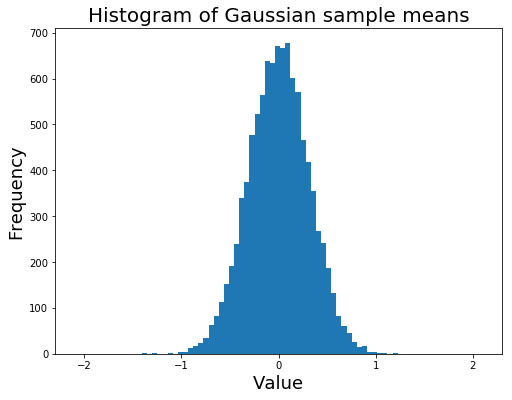

In [9]:
# Now plot a histogram of our averages, with 50 bins
histogram_continuous(
    means, 
    title='Histogram of Gaussian sample means', 
    nbins=50, 
    xlim=[-2.3, 2.3]
)

The histogram should look like a Gaussian curve, as it does. The central limit theorem says that the distribution of the sample means always converges to a Gaussian as N grows large, regardless of the sample distribution. Here we have N=10, which is sufficiently large for a Gaussian-looking curve.

Recall from HW4 that, for a collection of $n$ samples drawn from $\mathcal{N}(\mu, \sigma)$, the distribution of averages converges to $\mathcal{N}(\mu, \sigma/\sqrt{n})$ as $n$ grows sufficiently large. Since the standard deviation convergences to $\sigma/\sqrt{n}$, the variance (std-dev squared) converges to $\sigma^2/n$.
Thus, since we are drawing 10 samples from a distribution with $\sigma=1$, our averages converge to a Gaussian w/ variance $1^2/10 = 0.1$. Let's check that this matches our empirical variance:

In [11]:
means.var()

0.096473225582005967

It matches within reasonable precision error.

## (b)

In [17]:
# Compute the medians of our sample sets
medians = np.median(X, axis=1)

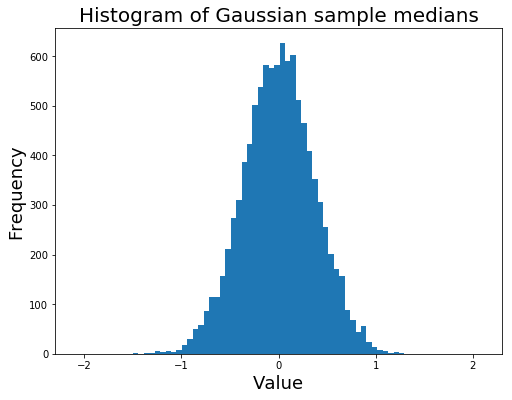

In [19]:
# Now plot a histogram of our means, with 50 bins
histogram_continuous(
    medians, 
    title='Histogram of Gaussian sample medians', 
    nbins=50, 
    xlim=[-2.3, 2.3]
)

This curve again has a Gaussian-like shape, similar to the distribution of means. Let's use the Q-Q plot to compare it to the normal distribution:

In [16]:
from scipy import stats

def normplot(x, title=None):
    """
    A function to replicate Matlab's "normplot" functionality. Takes
    a set of points and displays the Q-Q plot for these points.
    """
    plt.figure(figsize=(10,8))
    # Calculate quantiles and least-square-fit curve
    (quantiles, values), (slope, intercept, r) = stats.probplot(x, dist='norm')
    # Plot results
    plt.plot(values, quantiles,'ob', marker='+')
    plt.plot(quantiles * slope + intercept, quantiles, 'r')
    #define ticks
    ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
    # Transfrom them from precentile to cumulative density
    ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
    # Assign new ticks
    plt.yticks(ticks_quan,ticks_perc)
    if title is not None:
        plt.title(title, fontsize=20)
    plt.ylabel('Probability (%)', fontsize=18)
    plt.xlabel('Data', fontsize=18)
    plt.show()

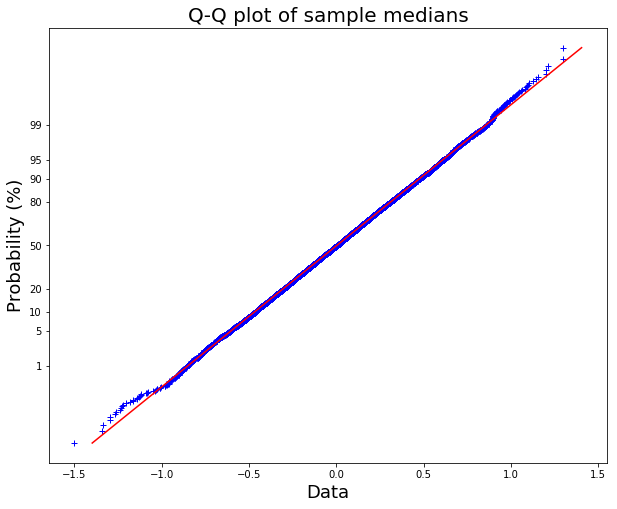

In [26]:
# Show the Q-Q plot
normplot(medians, title='Q-Q plot of sample medians')

No, the distribution of medians does not deviate significantly - it looks approximately Normal (points are a straight line).

## (c)

In [15]:
def compute_min_max_means(X):
    """
    A helper function that takes a data set of size 
    (nb_trials, nb_samples_per_trial) and computes, 
    for each trial, the mean of the max and min for
    that trial.
    """
    # Compute the max for each sample
    maxs = X.max(axis=1).reshape(-1,1)
    # Compute the min for each sample
    mins = X.min(axis=1).reshape(-1,1)
    # Concatenate max and min of each sample along an axis so 
    # that averages can be computed easily
    conc = np.concatenate((maxs, mins), axis=1)
    # Compute min,max average for each sample
    min_max_means = conc.mean(axis=1)
    
    return min_max_means

In [39]:
min_max_means = compute_min_max_means(X)

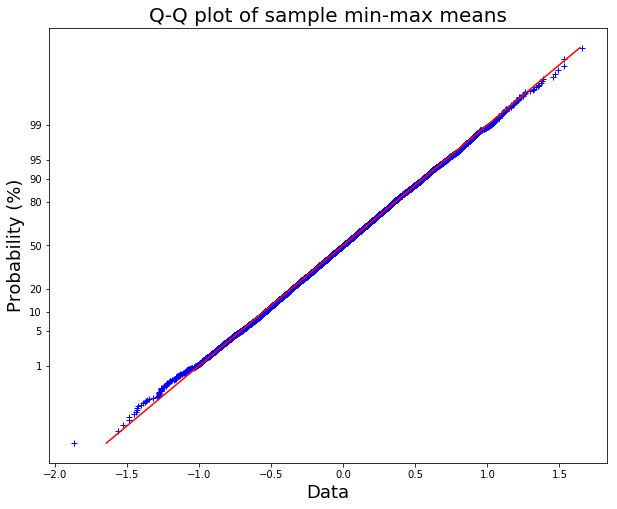

In [41]:
# Show the Q-Q plot
normplot(min_max_means, title='Q-Q plot of sample min-max means')

Once again, our distribution looks approximately normal for the min-max means. The points fall on a straight line in the Q-Q plot.

## (d)

In [17]:
# Generate 10,000 samples, each of size 256
X = np.random.normal(size=(10000, 256))

In [18]:
# For each sample size, compute the estimator values; these
# will be size (10000,) in each case.
grid = [8, 16, 32, 64, 128, 256]
mean_vars = []
median_vars = []
mmm_vars = []
for nb_samples in grid:
    means = X[:,:nb_samples].mean(axis=1)
    medians = np.median(X[:,:nb_samples], axis=1)
    min_max_means = compute_min_max_means(X[:,:nb_samples])
    mean_vars.append(means.var())
    median_vars.append(medians.var())
    mmm_vars.append(min_max_means.var())

In [19]:
# Now compute theoretical variance values of our average estimator
# for each n
theoretical_vars = [1/n for n in grid]

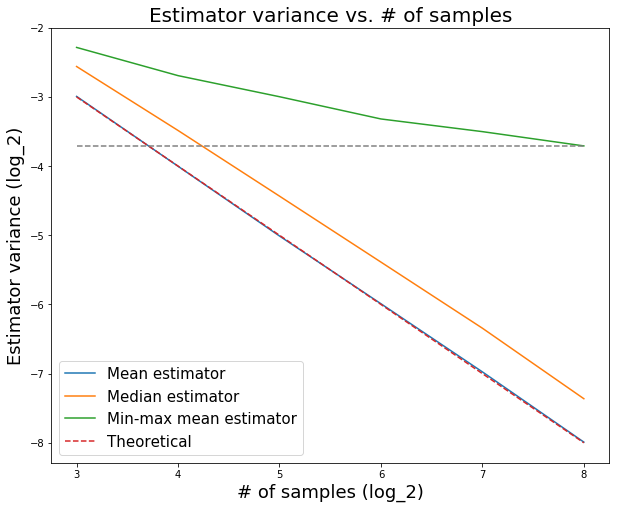

In [39]:
# Now show the plots
plt.figure(figsize=(10, 8))
plt.plot(np.log2(grid), np.log2(mean_vars), label='Mean estimator')
plt.plot(np.log2(grid), np.log2(median_vars), label='Median estimator')
plt.plot(np.log2(grid), np.log2(mmm_vars), label='Min-max mean estimator')
plt.plot(np.log2(grid), np.log2(theoretical_vars), '--', label='Theoretical')
plt.plot(np.log2(grid), np.log2([mmm_vars[-1] for _ in mmm_vars]), '--', color='grey')
plt.legend(prop={'size': 15})
plt.title('Estimator variance vs. # of samples', fontsize=20)
plt.xlabel('# of samples (log_2)', fontsize=18)
plt.ylabel('Estimator variance (log_2)', fontsize=18)
plt.show()

In [ ]:
# Note that the theoretical values and the mean estimator 
# values overlap; I used a dashed line to help distinguish 
# the theoretical values.

In [43]:
import math
print('%0.2f' % math.pow(2,3.8))
print('%0.2f' % math.pow(2,4.3))

13.93
19.70


The mean and median estimators converge at the same rate (i.e. have the same line slope), however, the median estimator has a larger y-intercept: it is about 0.5 units higher than the mean estimator at all times (on $log_2(x)$ scale). The min-max mean estimator, on the other hand, converges at a slower rate than the other two. To achieve the same variance that the min-max mean estimator gets at $n=256$ (or $n=8$ on the $log_2(x)$ scale), we can see on the graph (dashed grey line) that the median estimator would need $n = 2^{4.3} \sim 20$, and the mean estimator would need $n = 2^{3.8} \sim 14$. Thus they would require many fewer samples.

# Problem #2

## (a)

Let $A$ denote the event that we have activation in the Broca area of a human subject, and $L$ the event that the subject is using language (denote the inverse case, no language, as $NL$). We assume that the conditional distributions $P(A|L)$ and $P(A|NL)$ are both Bernoulli distributions, each parameterized by occurance probabilities $x_l$ and $x_{nl}$, respectively:

$P(A|L)\sim Bernoulli(x_l)$, $P(A|NL)\sim Bernoulli(x_{nl})$.

Recall that the probability of $k$ successes given $n$ samples from a Bernoulli distribution with success probability $p$ is equal to 

$P(k) = \binom{n}{k} p^k(1-p)^{n-k} = \frac{n!}{k!(n-k)!} p^k(1-p)^{n-k}$,

the well-known Binomial distribution. Thus in our case, we have

P(103 activated of 869 | L) $=\frac{869!}{103!*766!} x_l^{103}(1-x_l)^{766}$,

P(199 activated of 2353 | NL) $=\frac{2353!}{199!*2154!} x_{nl}^{199}(1-x_{nl})^{2154}$.

In [59]:
# Write Python functions to evaluate these two expressions, P(A | L) and P(A | NL),
# for different binomial p values.

def likelihood_l(x_l):
    assert 0 <= x_l <= 1
    n_choose_k = math.factorial(869)/(math.factorial(103)*math.factorial(766))
    likelihood = n_choose_k*math.pow(x_l, 103)*math.pow(1-x_l, 766)
    assert 0 <= likelihood <= 1
    
    return likelihood

def likelihood_nl(x_nl):
    assert 0 <= x_nl <= 1
    n_choose_k = math.factorial(2353)/(math.factorial(199)*math.factorial(2154))
    likelihood = n_choose_k*math.pow(x_nl, 199)*math.pow(1-x_nl, 2154)
    assert 0 <= likelihood <= 1
    
    return likelihood

In [72]:
# For x = [0:0.001:1], compute likelihoods of language-engaged 
# and non-language-engaged observations
x = np.linspace(0, 1, 1001)
p_l = [likelihood_l(x_l) for x_l in x]
p_nl = [likelihood_nl(x_nl) for x_nl in x]

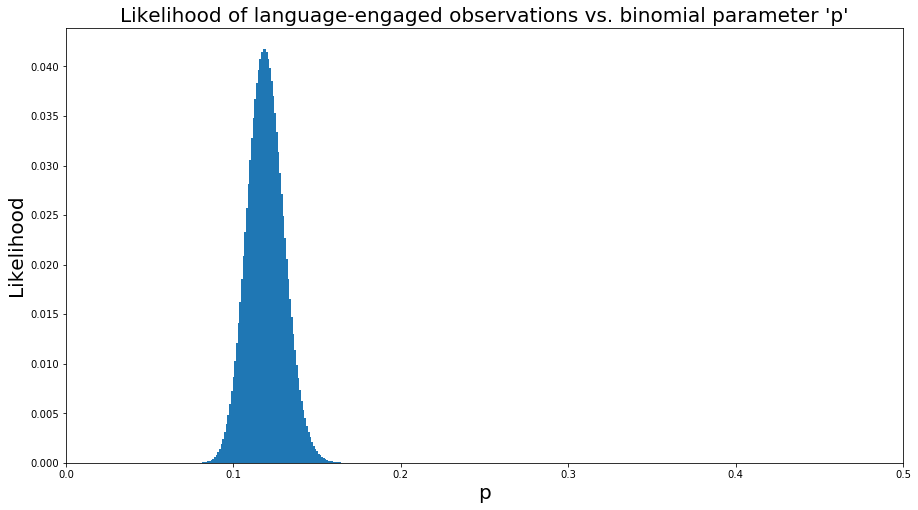

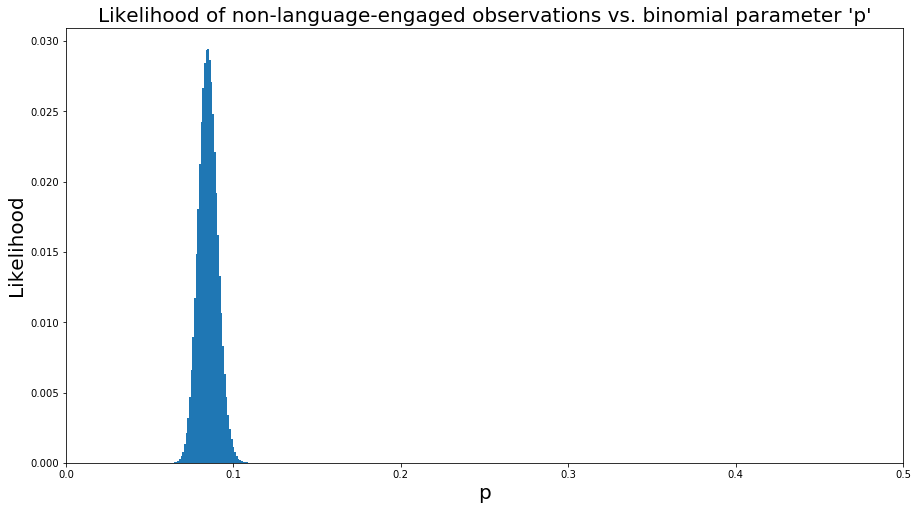

In [85]:
# Plot likelihoods as a bar graph. We will only show p=0:0.5, since
# all values are 0 after 0.5
plt.figure(figsize=(15,8))
plt.bar(x, p_l, width=0.001)
plt.title("Likelihood of language-engaged observations vs. binomial parameter 'p'", fontsize=20)
plt.ylabel('Likelihood', fontsize=20)
plt.xlabel('p', fontsize=20)
plt.xlim(0, 0.5)
plt.show()

plt.figure(figsize=(15,8))
plt.bar(x, p_nl, width=0.001)
plt.title("Likelihood of non-language-engaged observations vs. binomial parameter 'p'", fontsize=20)
plt.ylabel('Likelihood', fontsize=20)
plt.xlabel('p', fontsize=20)
plt.xlim(0, 0.5)
plt.show()

## (b)

In [96]:
# Find value of x that maximizes each of these 2 likelihood functions
ind_max_l = np.argmax(p_l)
ind_max_nl = np.argmax(p_nl)
x_max_l = x[ind_max_l]
x_max_nl = x[ind_max_nl]
print('maximum likelihood x for language-engaged observations: %0.4f' % x_max_l)
print('maximum likelihood x for non-language-engaged observations: %0.4f' % x_max_nl)

maximum likelihood x for language-engaged observations: 0.1190
maximum likelihood x for non-language-engaged observations: 0.0850


In [98]:
# Now compare these to the ML estimator values
print('ML estimate for language-engaged observations: %0.4f' % (103/869))
print('ML estimate for non-language-engaged observations: %0.4f' % (199/2353))

ML estimate for language-engaged observations: 0.1185
ML estimate for non-language-engaged observations: 0.0846


So we see that the p values that maximize our likelihood function are very close to the ML estimates given by formula.

## (c)

## (d)

## (e)

# Problem #3

## (a)

## (b)

## (c)

## (d)